In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import joblib, json, sys, os
from IPython.display import Image, display_png

sys.path.append("../script/")
#from MergeBrain import WholeBrainCells
import matplotlib.pyplot as plt
import pandas as pd

import sys, os, os.path, re, csv, math
import linecache
import numpy as  np
import pandas as pd
from matplotlib import pyplot as plt
from statistics import mean,stdev
import seaborn as sns

import csv
import pprint
#import ants
import tifffile
from multiprocessing import Pool
import datetime
from itertools import product

import numpy as np
import tifffile
import os
import pickle
import joblib
import pandas as pd
from matplotlib import pyplot as plt
import concurrent.futures
import gc
import json

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True
plt.rcParams['font.size'] = 16

In [2]:
conditions = {
    "WT_1m": ["#4_APPmodel_Ctr1m_1_2022_1104_1550","#4_APPmodel_Ctr1m_2_2022_1108_959","#4_APPmodel_Ctr1m_3_2022_1209_1751"],
    "WT_2m": ["8w_B6JWT_atlas_1_2022_0924_1847","8w_B6JWT_atlas_2_2022_0926_1326", "8w_B6JWT_atlas_3_2022_1005_1110", "8w_B6JWT_atlas_4_2022_1010_2030","8w_B6JWT_atlas_5_2023_0423_1604",],
    "WT_3m": ["#5_APPmodel_Ctr3m_1_2023_0113_1230", "#5_APPmodel_Ctr3m_2_2023_0210_1142", "#5_APPmodel_Ctr3m_3_2023_0227_1605", "#4_APPmodel_Ctr3m_4_2023_0427_1444",],
    "WT_5m": ["#4_APPmodel_Ctr5m_1_2022_1026_252", "#4_APPmodel_Ctr5m_2_2022_1028_2336", "#4_APPmodel_Ctr5m_3_2022_1101_140", "#4_APPmodel_Ctr5m_4_2023_0512_2057"],
    "WT_7m": [ "#5_APPmodel_Ctr7m_1_2023_0206_1534","#5_APPmodel_Ctr7m_2_2023_0313_1111","#5_APPmodel_Ctr7m_3_2023_0331_2139","#4_APPmodel_Ctr7m_4_2023_0516_1559","#5_APPmodel_Ctr7m_5_2023_0522_2218"],
    "WT_9m": [ "#5_APPmodel_Ctr9m_1_2023_0130_1607", "#5_APPmodel_Ctr9m_2_2023_0216_2052" ,"#5_APPmodel_Ctr9m_3_2023_0322_2014","#5_APPmodel_Ctr9m_4_2023_0518_1449"],
    "WT_12m": ["56w_B6JWT_atlas_1_2022_1128_1548", "56w_B6JWT_atlas_2_2022_1221_1537", "56w_B6JWT_atlas_3_2022_1224_1718"],
    
    "APP_1m": ["#4_APPmodel_APP1m_1_2022_1102_1304", "#4_APPmodel_APP1m_2_2022_1106_1708","#4_APPmodel_APP1m_3_2022_1213_2151","#4_APPmodel_APP1m_4_2023_0417_2052", ],
    "APP_3m": [ "#5_APPmodel_APP3m_2_2023_0123_1645", "#5_APPmodel_APP3m_3_2023_0212_2217","#5_APPmodel_APP3m_4_2023_0214_2027","#4_APPmodel_APP3m_5_2023_0502_1423",],
   "APP_5m": ["#4_APPmodel_APP5m_1_2022_1024_1336", "#4_APPmodel_APP5m_2_2022_1027_1333","#4_APPmodel_APP5m_3_2022_1030_1257", "#4_APPmodel_APP5m_4_2023_0509_1021"],
    "APP_7m": ["#5_APPmodel_APP7m_2_2023_0315_1540","#5_APPmodel_APP7m_3_2023_0310_1401","#5_APPmodel_APP7m_4_2023_0317_1630", "#5_APPmodel_APP7m_5_2023_0520_1723"],
    "APP_9m": ["#5_APPmodel_APP9m_1_2023_0117_1352","#5_APPmodel_APP9m_2_2023_0327_1425", "#5_APPmodel_APP9m_3_2023_0329_1611", "#5_APPmodel_APP9m_4_2023_0403_1443" ],
       
    "VCP_mut_2m": ["VCPmodel_E524A_0.5x_1_2022_0624_1303", "VCPmodel_E524A_0.5x_2_2022_0626_1338", "VCPmodel_E524A_0.5x_4_2022_0922_1217", "VCPmodel_E524A_0.5x_6_2022_0628_1157"], 
   "VCP_WT_2m": ["VCPmodel_WT_0.5x_1_2022_0625_1104","VCPmodel_WT_0.5x_2_2022_0917_1808", "VCPmodel_WT_0.5x_3_2022_0627_1257", "VCPmodel_WT_0.5x_4_2022_0921_950","VCPmodel_WT_0.5x_5_2022_0923_1454","VCPmodel_WT_0.5x_6_2022_0929_953"],
    "newVCP_mut_2m": ["#5_VCPmodel_E524A_0.5x_1_2023_0120_1929","#5_VCPmodel_E524A_0.5x_2_2023_0407_1031", "#5_VCPmodel_E524A_0.5x_3_2023_0413_2036"], 
   "newVCP_WT_2m": ["#5_VCPmodel_WT_0.5x_1_2023_0405_1108","#5_VCPmodel_WT_0.5x_2_2023_0115_1852","#5_VCPmodel_WT_0.5x_3_2023_0410_1246"], 
    
    "TMT_2m": ["#3_TMTmodel_TMT3.0_8w_1_2022_1014_1410", "#3_TMTmodel_TMT3.0_8w_2_2022_1020_938", "#3_TMTmodel_TMT3.0_8w_3_2022_1023_501", "#3_TMTmodel_TMT_8w_5_2022_1205_1147",],
  "Saline_2m": ["#3_TMTmodel_Saline_8w_1_2022_1016_1318", "#3_TMTmodel_Saline_8w_2_2022_1018_2103","#3_TMTmodel_Saline_8w_3_2022_1021_1910", "#3_TMTmodel_Saline_8w_4_2022_1202_1349", "#3_TMTmodel_Saline_8w_5_2022_1217_1723", "#3_TMTmodel_Saline_8w_6_2022_1216_001"],
    
}

In [3]:
data_Atlas = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/count_all_rgb.csv", encoding="ms932", sep=",")
# インプットの項目数（行数 * カラム数）を返却します。
data_atlas=np.array(data_Atlas.values.tolist())
#print(data_Atlas.size)
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO = pd.read_csv(filepath_or_buffer="/data4/ds1_Imaging3/atlas_for_fig/GOvsID_6region_removed.csv", encoding="ms932", sep=",")
# 指定したカラムだけ抽出したDataFrameオブジェクトを返却します。
data_GO

,id,graph_order,R,G,B
0,997,0,255,255,255
1,68,7,38,143,69
2,667,8,38,143,69
3,52192,9,38,143,69
4,52196,10,38,143,69
...,...,...,...,...,...
666,129,1299,170,170,170
667,140,1300,170,170,170
668,145,1301,170,170,170
669,153,1302,170,170,170


In [4]:
colorlist=[]

total = 0
for i in range (671):
    atlas_id_num = data_GO["id"].values[i]
    colorlist.append((data_GO["R"].values[i]/255,data_GO["G"].values[i]/255,data_GO["B"].values[i]/255))
colorlist_671=colorlist

In [5]:
# 下記は一部のidだけが対象
dir= "/data4/ds1_Imaging3/cubic-atlas_v1-1/cubic-atlas/"
dir_ana=dir+"summary_CUBIC-Atlas-1-1.csv"


data_id = pd.read_csv(filepath_or_buffer=dir_ana, encoding="ms932", sep=",")
data_id

,id,acronym,node_name,graph_order,rgb_triplet,cell_count,volume(mm3),density(cells/mm3)
0,997,root,root,0,"[255, 255, 255]",78620375,506.05289,155359.99590
1,8,grey,Basic cell groups and regions,1,"[191, 218, 227]",70525778,449.60086,156863.08540
2,567,CH,Cerebrum,2,"[176, 240, 255]",39291452,275.87673,142423.94190
3,688,CTX,Cerebral cortex,3,"[176, 255, 184]",31750427,221.54964,143310.66800
4,695,CTXpl,Cortical plate,4,"[112, 255, 112]",30687805,212.64380,144315.54300
...,...,...,...,...,...,...,...,...
834,129,V3,third ventricle,1299,"[170, 170, 170]",144614,0.90005,160673.85380
835,140,AQ,cerebral aqueduct,1300,"[170, 170, 170]",26972,0.40620,66400.27696
836,145,V4,fourth ventricle,1301,"[170, 170, 170]",118275,0.96495,122570.72070
837,153,V4r,lateral recess,1302,"[170, 170, 170]",71934,0.46333,155254.98260


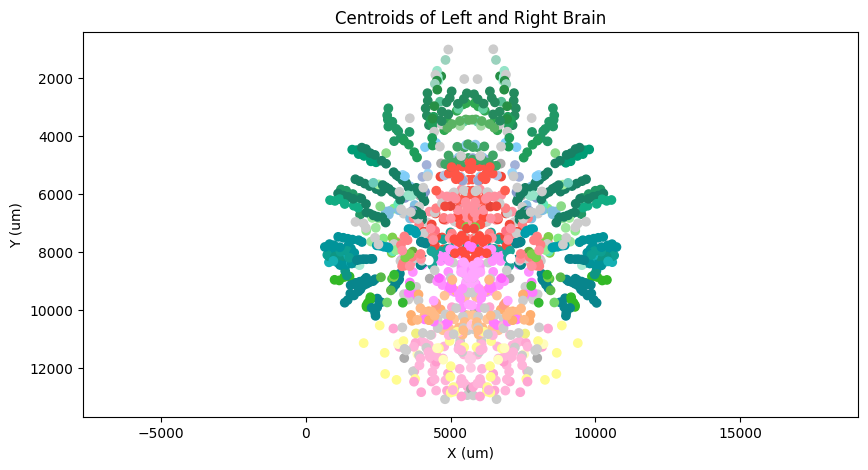

In [6]:
# whole brain plotをする
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# バイナリファイルを読み込む
dt_type = np.dtype([
  ('X(um)', 'f4'), ('Y(um)', 'f4'), ('Z(um)', 'f4'), ('atlasID', 'u2')
])
grid_points = np.fromfile("/data4/atlas/annotation_50_non_zero_coordinates.bin", dt_type)
grid_points = pd.DataFrame(grid_points)

# 左脳と右脳のデータを分割
left_points = grid_points[grid_points['X(um)'] < 5700]
right_points = grid_points[grid_points['X(um)'] >= 5700]

# atlasIDごとに重心を計算する関数
def calculate_centroids(df):
    centroids = df.groupby('atlasID').agg({'X(um)': 'mean', 'Y(um)': 'mean', 'Z(um)': 'mean'}).reset_index()
    return centroids

# 左脳と右脳の重心を計算
left_centroids = calculate_centroids(left_points)
right_centroids = calculate_centroids(right_points)

# 重心データを結合
all_centroids = pd.concat([left_centroids, right_centroids])



# 色情報の辞書を生成
color_dict = {row['id']: (row['R']/255, row['G']/255, row['B']/255) for index, row in data_GO.iterrows()}

# atlasIDに基づいて各点の色を決定
all_centroids['color'] = all_centroids['atlasID'].map(color_dict).apply(lambda x: x if isinstance(x, tuple) else (0.5, 0.5, 0.5))  # 色が見つからない場合は灰色

# xy座標をプロット（すべての重心を1つのプロットに表示）
plt.figure(figsize=(10, 5))
plt.scatter(all_centroids['X(um)'], all_centroids['Y(um)'], color=all_centroids['color'].tolist())
plt.title('Centroids of Left and Right Brain')
plt.xlabel('X (um)')
plt.ylabel('Y (um)')
plt.axis('equal')  # 軸を等方的にする
plt.gca().invert_yaxis()  # Y軸を反転
plt.show()


In [ ]:
#Fig.2d まずは、densityやratioをWhole brain plotする。

In [8]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import rpy2.robjects as robjects
# Rのインスタンスを取得
r = robjects.r
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# Rのライブラリをロード
r = robjects.r
r('library(MASS)')
import numpy as np
import rpy2.robjects as robjects
# Rのインスタンスを取得
r = robjects.r
from rpy2.robjects import pandas2ri
pandas2ri.activate()
# Rのライブラリをロード
r = robjects.r
r('library(MASS)')

def run_glm (data):
        
    # R環境にデータフレームを渡す
    ro.globalenv['data'] = pandas2ri.py2rpy(data)
    # pdfClusterを実行
    r_code = '''
    library(MASS)
    model <- glm.nb('log_All_cell_count ~ Age', data = data)
    coef <- summary(model)$coefficients["Age", "Estimate"]
    p_value <- summary(model)$coefficients["Age", "Pr(>|z|)"]
    c(coef, p_value)
    '''
    #results_ <- summary(model)
    #results_ <- summary(model)
    #p_value <- summary(model)$Coefficients["Genetic", "Pr(>|z|)"]
    #coef <- summary(model)$Coefficients["Genetic", "coef"]
    ro.r(r_code)

    results = ro.r(r_code)
    
    coef = results[0]
    p_value = results[1]
    print(f"Coefficient: {coef}, p-value: {p_value}")
    
    return coef, p_value


# サンプルごとにデータを読み込んで 'Condition' 列を追加する関数を修正
def load_data(sample_info):
    df_list = []
    for sample, condition in sample_info:  # sample_infoには(sample_path, condition)のタプルが格納されている
        param_path = f"/home/mitani/CUBIC-informatics/param/Neuronomics/{sample}/param_multichannel-rank.json"
        try:
            with open(param_path) as f:
                param = json.load(f)
            fw_dir_nu = param["dst_basedir"]

            cellome_file = fw_dir_nu + "/Regional_cellome4.csv"
            if os.path.exists(cellome_file):  # 確認するファイルパスに注意
                print(sample)
                df = pd.read_csv(cellome_file)
                df['Condition'] = condition  # 'Condition' 列を追加
                df['Sample'] = sample  # サンプル名を追加
                df_list.append(df)
        except Exception as e:
            print(f"Error loading data for {sample}: {e}")

    return pd.concat(df_list, ignore_index=True) if df_list else pd.DataFrame()

# Healthy controlとDiseaseのサンプル情報のタプルを取得
healthy_sample_info = [(s, c) for c in ["Saline_2m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in ["APP_1m", "APP_3m", "APP_5m", "APP_7m", "APP_9m"] for s in conditions[c]]
#healthy_sample_info = [(s, c) for c in ["WT_7m", "WT_9m"] for s in conditions[c]]
#disease_sample_info = [(s, c) for c in [  "APP_7m", "APP_9m"] for s in conditions[c]]

# データを読み込む
healthy_data = load_data(healthy_sample_info)
#disease_data = load_data(disease_sample_info)

# AgeとGeneticの列を追加
healthy_data['Age'] = healthy_data['Condition'].str.extract('(\d+)m').astype(int)
healthy_data['Genetic'] = 0  # Healthyは0
#disease_data['Age'] = disease_data['Condition'].str.extract('(\d+)m').astype(int)
#disease_data['Genetic'] = 1  # Diseaseは1


def normalize_and_calculate_difference(data):
    # atlasIDごとにループ
    for atlas_id in data['atlasID'].unique():
        # 各年齢、各ジェネティックタイプに対して正規化を実行
        for age in data['Age'].unique():
            avg_ctr = data[(data['atlasID'] == atlas_id) & (data['Genetic'] == 0) & (data['Age'] == age)]['Iba1+ density (/mm3)'].mean()
            
            data.loc[(data['atlasID'] == atlas_id) & (data['Age'] == age) & (data['Genetic'] == 0), 'Normalized'] = data[(data['atlasID'] == atlas_id) & (data['Age'] == age) & (data['Genetic'] == 0)]['Iba1+ density (/mm3)'] - avg_ctr 
            data.loc[(data['atlasID'] == atlas_id) & (data['Age'] == age) & (data['Genetic'] == 1), 'Normalized'] = data[(data['atlasID'] == atlas_id) & (data['Age'] == age) & (data['Genetic'] == 1)]['Iba1+ density (/mm3)'] - avg_ctr
        #mini = data.loc[(data['atlasID'] == atlas_id), 'Normalized'].min()
        #data.loc[(data['atlasID'] == atlas_id),'Normalized'] = data.loc[(data['atlasID'] == atlas_id),'Normalized'].copy() - mini
    return data

# データを結合
#all_data = pd.concat([healthy_data, disease_data])
all_data = healthy_data



#3_TMTmodel_Saline_8w_1_2022_1016_1318
#3_TMTmodel_Saline_8w_2_2022_1018_2103
#3_TMTmodel_Saline_8w_3_2022_1021_1910
#3_TMTmodel_Saline_8w_4_2022_1202_1349
#3_TMTmodel_Saline_8w_5_2022_1217_1723
#3_TMTmodel_Saline_8w_6_2022_1216_001


In [14]:
data_pivot 

Condition,Saline_2m
atlasID,
1,9846.833333
2,9109.000000
6,16510.833333
7,62206.166667
9,26482.000000
...,...
60850,1260.833333
60854,1637.833333
60858,2123.833333


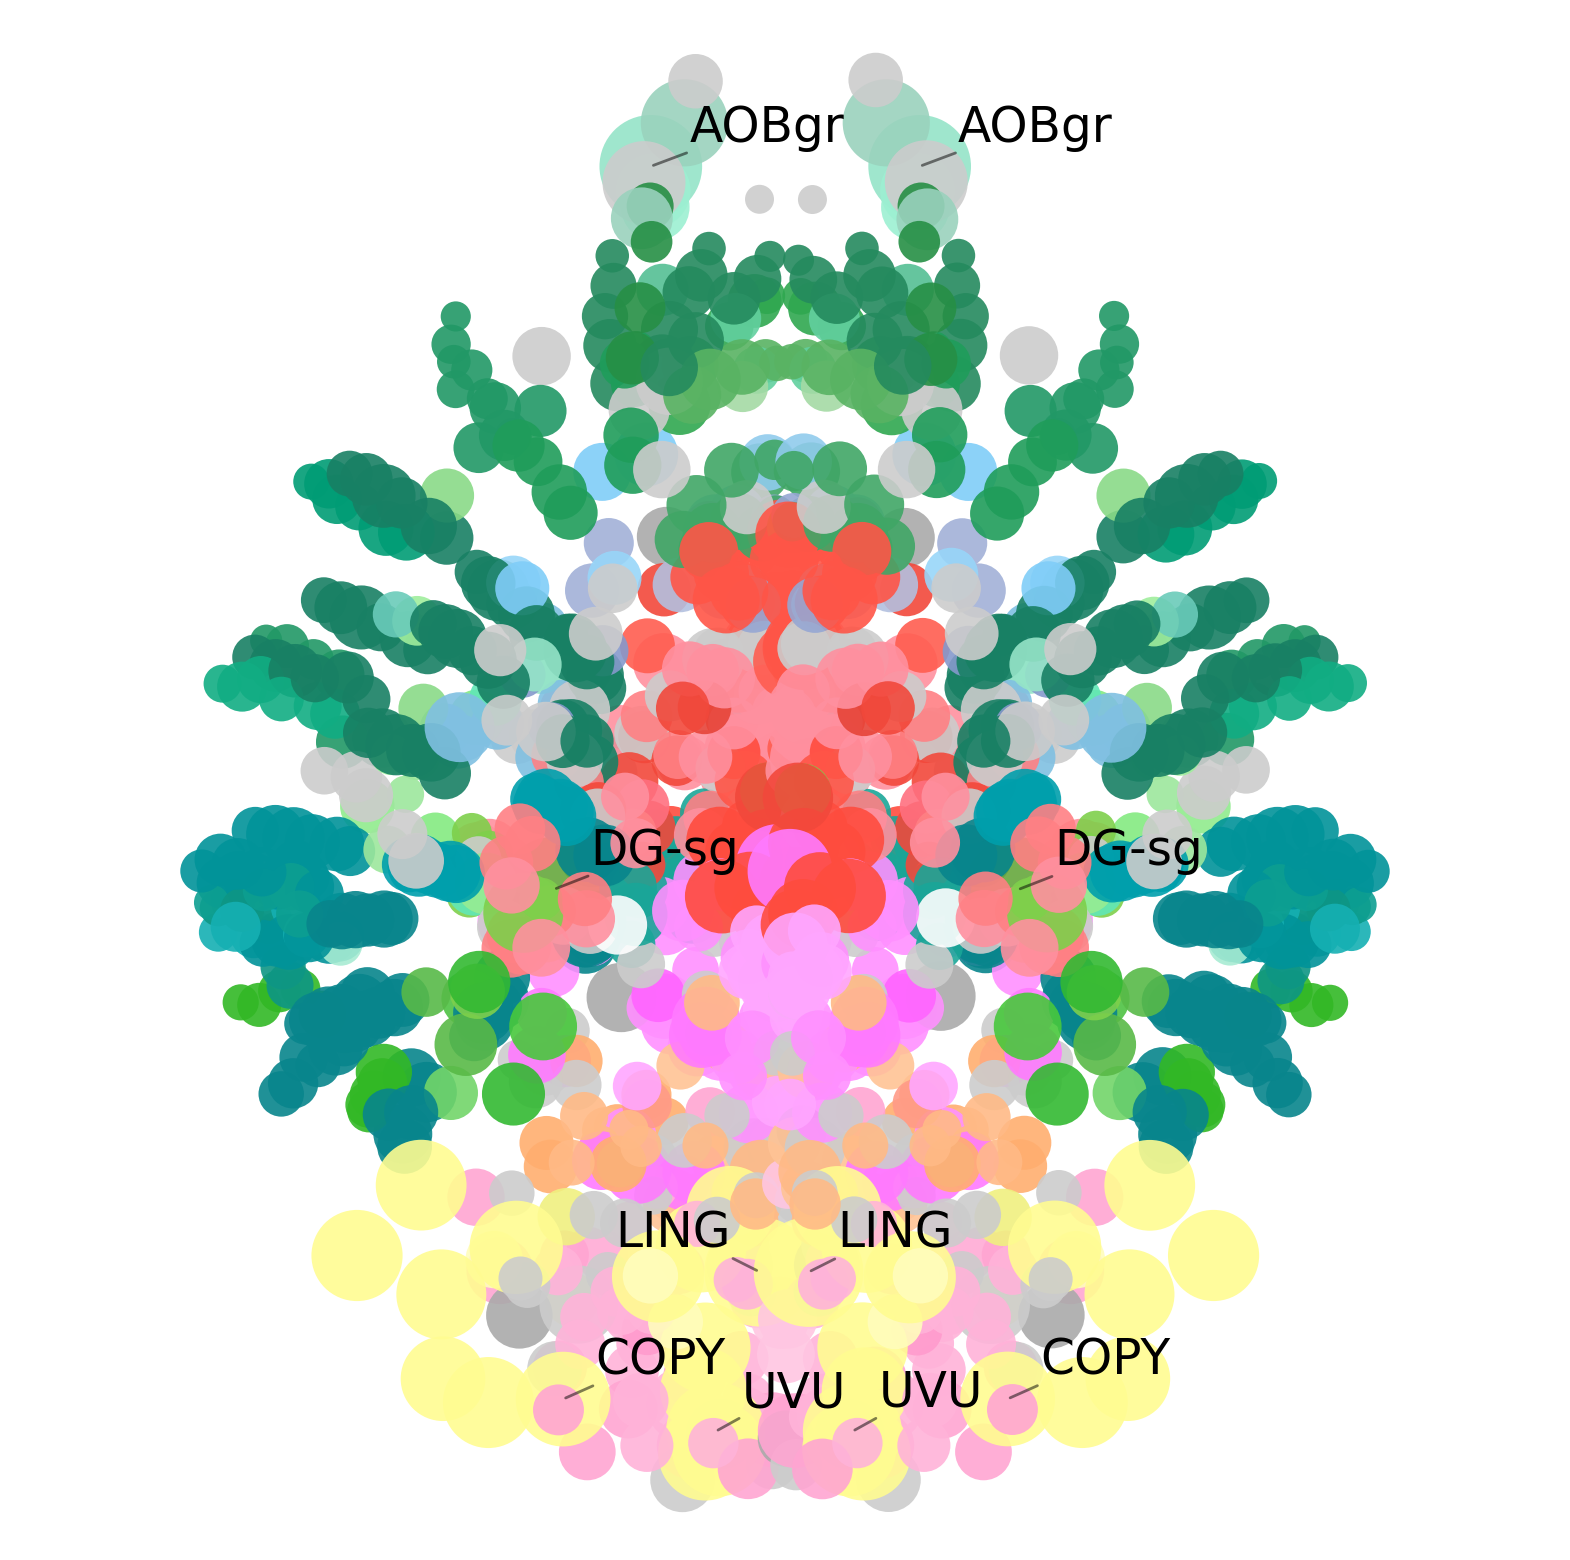

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
from adjustText import adjust_text  # adjustText ライブラリをインポート

import matplotlib
matplotlib.rcParams['pdf.use14corefonts'] = True

# atlasID に対応する acronym (region名) をマッピング
all_centroids['acronym'] = all_centroids['atlasID'].map(data_id.set_index('id')['acronym'])

# NeuN_cell_countの平均を計算
data_grouped = data.groupby('atlasID')['All cell density (/mm3)'].mean()

# all_centroids に対して NeuN_cell_count をマッピング
all_centroids['NeuN_cell_count'] = all_centroids['atlasID'].map(data_grouped)

# グラフのプロット
plt.figure(figsize=(20, 20))
plt.gca().invert_yaxis()
texts = []  # テキストオブジェクトを保存するリスト

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 10

# NeuN_cell_countに基づいてサイズを設定し、色は既存の 'color' 列に基づく
for i, row in all_centroids.iterrows():
    color = row['color']  # 色は既存の 'color' 列を使用
    size = row['NeuN_cell_count'] * 0.01  # NeuN_cell_count に基づくサイズ (適宜スケール調整)
    plt.scatter(row['X(um)'], row['Y(um)'], s=size, color=color, alpha=0.9, edgecolor='none')

# 上位5つのregion名を表示するためのデータ（適宜調整可能）
top_regions = all_centroids.nlargest(10, 'NeuN_cell_count')

# 上位5位の点のみにテキストを追加
for i, row in top_regions.iterrows():
    texts.append(plt.text(row['X(um)'], row['Y(um)'], row['acronym'],  # atlasIDの代わりにacronymを使用
                          ha='center', va='center', fontsize=35, color="black", ))

# adjust_textでテキストの重なりを調整
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color=(0, 0, 0), alpha=0.5, linewidth=2),
            expand_points=(1.5, 1.5),  # ポイントからの距離を広げる
            expand_text=(1.2, 1.2),    # テキスト間の距離を広げる
            force_text=(1.2, 1.2),     # テキストを動かす力を強める
            force_points=(1.2, 1.2)    # ポイントを動かす力を強める
           )

# 軸の設定
plt.axis('equal')
plt.gca().spines['top'].set_visible(False)  # 上の軸線を非表示
plt.gca().spines['right'].set_visible(False)  # 右の軸線を非表示
plt.gca().spines['left'].set_visible(False)  # 左の軸線を非表示
plt.gca().spines['bottom'].set_visible(False)  # 下の軸線を非表示
plt.xticks([])  # X軸の目盛りを非表示
plt.yticks([])  # Y軸の目盛りを非表示

plt.savefig('/data5/mitani/Neurology/Fig.2/Total_cell_density_by_Whole_Brain_Plot.pdf', 
            transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
